### Batch: D7

 ### SRM Institute of Science and Technology, Ramapuram

 Dhananjay Narayan - RA1611003020223

Alok Kumar        - RA1611003020211

Ayush Sharma      - RA1611003020238

Guided By - Ms. Subashree D 

# Karnataka Pollution Data Analysis

This Python Notebook File Demonstrates the Analysis and Visualization of the Pollution Data of Karnataka, India.

In [63]:
#importing Libraries

import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


The dataset is taken from the website gov.data.in
Data is available for many other states as well. We have chosen the state of Karnataka to work with. 

In [2]:
dataset = pd.read_csv('polldata-karnataka-2015.csv') #Reading the CSV File

In [3]:
ds=dataset.copy() # Copying the the dataset values to a new variable 'ds' so that original data is not changed in the file

In [4]:
ds.head() # Shows the first five values. We can see the various columns that exists in the dataset

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,40.0,03-01-2015,Karnataka,Mysore,"K.R.Circle, Visvesvaraya Bldg., Mysore",Karnataka State Pollution Control Board,Households,10.0,22.0,39.0,NaN
1,40.0,06-01-2015,Karnataka,Mysore,"K.R.Circle, Visvesvaraya Bldg., Mysore",Karnataka State Pollution Control Board,Households,11.0,22.0,40.0,NaN
2,40.0,09-01-2015,Karnataka,Mysore,"K.R.Circle, Visvesvaraya Bldg., Mysore",Karnataka State Pollution Control Board,Households,11.0,22.0,37.0,NaN
3,40.0,13-01-2015,Karnataka,Mysore,"K.R.Circle, Visvesvaraya Bldg., Mysore",Karnataka State Pollution Control Board,Households,11.0,24.0,44.0,NaN
4,40.0,17-01-2015,Karnataka,Mysore,"K.R.Circle, Visvesvaraya Bldg., Mysore",Karnataka State Pollution Control Board,Households,11.0,22.0,48.0,NaN


In [5]:
ds.info() # Shows the attributes of CSV file and its info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2392 non-null   float64
 1   Sampling Date                   2392 non-null   object 
 2   State                           2392 non-null   object 
 3   City/Town/Village/Area          2392 non-null   object 
 4   Location of Monitoring Station  2392 non-null   object 
 5   Agency                          2392 non-null   object 
 6   Type of Location                2392 non-null   object 
 7   SO2                             2352 non-null   float64
 8   NO2                             2352 non-null   float64
 9   RSPM/PM10                       2392 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(5), object(6)
memory usage: 205.8+ KB


Now, we delete the Unwanted Columns which are of no use to us in analysing the data. 

In [6]:
del ds['Agency']

In [7]:
del ds['Stn Code']

In [8]:
del ds['Location of Monitoring Station']

In [9]:
ds.head() # To check that the said columns are deleted 

,Sampling Date,State,City/Town/Village/Area,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,03-01-2015,Karnataka,Mysore,Households,10.0,22.0,39.0,NaN
1,06-01-2015,Karnataka,Mysore,Households,11.0,22.0,40.0,NaN
2,09-01-2015,Karnataka,Mysore,Households,11.0,22.0,37.0,NaN
3,13-01-2015,Karnataka,Mysore,Households,11.0,24.0,44.0,NaN
4,17-01-2015,Karnataka,Mysore,Households,11.0,22.0,48.0,NaN


In [10]:
ds.isnull().sum() #to check the count of null values

Sampling Date                1
State                        1
City/Town/Village/Area       1
Type of Location             1
SO2                         41
NO2                         41
RSPM/PM10                    1
PM 2.5                    2393
dtype: int64

In [11]:
ds = ds.dropna(axis = 0, subset = ['Type of Location'])

In [12]:
ds = ds.dropna(axis = 0, subset = ['SO2'])

In [13]:
ds = ds.dropna(axis = 0, subset = ['NO2'])

In [ ]:
del ds['PM 2.5'] # Too many Null Values. So deleted the entire column.

In [65]:
ds.isnull().sum()

Sampling Date       0
State               0
Place               0
Type of Location    0
SO2                 0
NO2                 0
RSPM/PM10           0
year                0
dtype: int64

In [66]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2392
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sampling Date     2352 non-null   datetime64[ns]
 1   State             2352 non-null   object        
 2   Place             2352 non-null   object        
 3   Type of Location  2352 non-null   object        
 4   SO2               2352 non-null   float64       
 5   NO2               2352 non-null   float64       
 6   RSPM/PM10         2352 non-null   float64       
 7   year              2352 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 236.2+ KB


Visualizing the data recorded with respect to Type of Location. Here we see that most of the data points were recorded in the Households Category. 

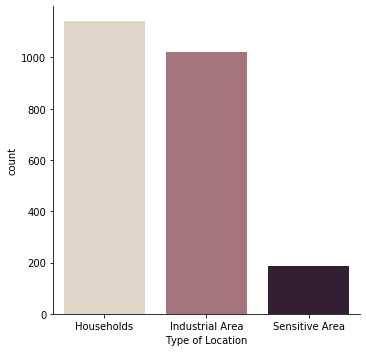

In [18]:
sb.catplot(x = "Type of Location", kind = "count", palette = "ch: 0.25", data = ds) 

In [21]:
ds.rename(columns={'City/Town/Village/Area': 'Place'}, inplace=True) #Renamed one column for short name for easy visualization.

In [22]:
ds.head() #The Column is renamed

,Sampling Date,State,Place,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,03-01-2015,Karnataka,Mysore,Households,10.0,22.0,39.0,NaN
1,06-01-2015,Karnataka,Mysore,Households,11.0,22.0,40.0,NaN
2,09-01-2015,Karnataka,Mysore,Households,11.0,22.0,37.0,NaN
3,13-01-2015,Karnataka,Mysore,Households,11.0,24.0,44.0,NaN
4,17-01-2015,Karnataka,Mysore,Households,11.0,22.0,48.0,NaN


# SO2 Concentrations with respect to Place, Type of Location.

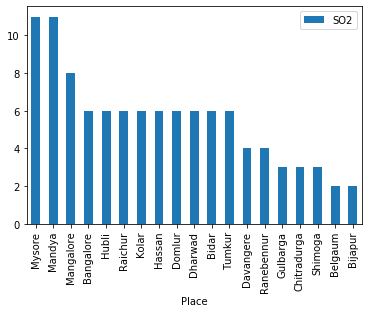

In [24]:
ds[['SO2', 'Place']].groupby(['Place']).median().sort_values("SO2", ascending = False).plot.bar() 

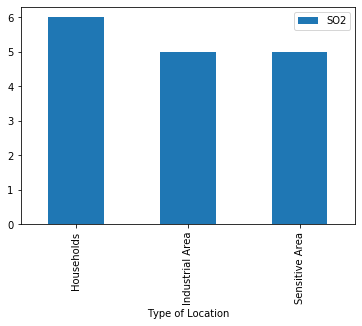

In [25]:
ds[['SO2', 'Type of Location']].groupby(['Type of Location']).median().sort_values("SO2", ascending = False).plot.bar()

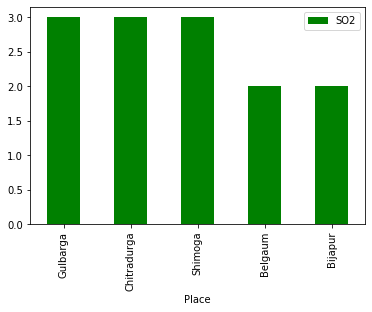

In [39]:
# Bar Plot of SO2 Concentration vs location - Least 5
ds[['SO2', 'Place']].groupby(['Place']).median().sort_values("SO2", ascending = False).tail(5).plot.bar(color = 'g')

# NO2 Concentrations with respect to Place, Type of Location.

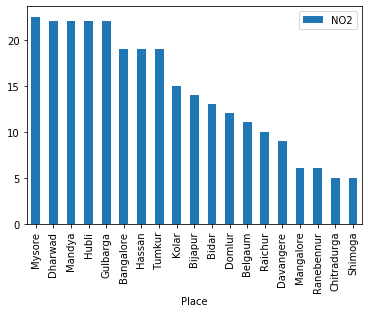

In [34]:
ds[['NO2', 'Place']].groupby(['Place']).median().sort_values("NO2", ascending = False).plot.bar()

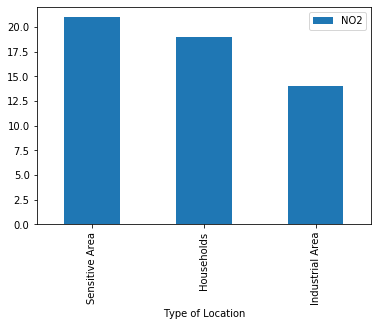

In [35]:
ds[['NO2', 'Type of Location']].groupby(['Type of Location']).median().sort_values("NO2", ascending = False).plot.bar()

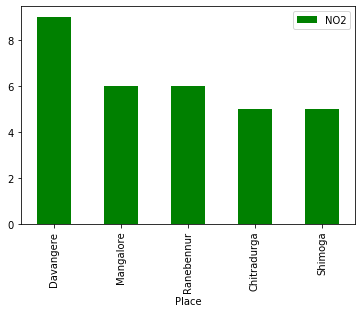

In [40]:
# Bar Plot of NO2 Concentration vs location - Least 5
ds[['NO2', 'Place']].groupby(['Place']).median().sort_values("NO2", ascending = False).tail(5).plot.bar(color = 'g')

# RSPM Concentrations with respect to Place, Type of Location.

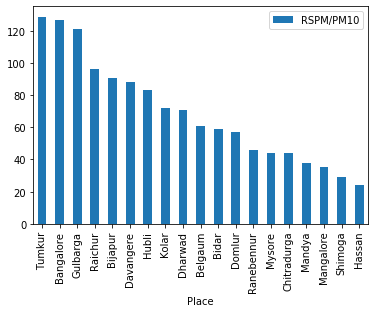

In [41]:
ds[['RSPM/PM10', 'Place']].groupby(['Place']).median().sort_values("RSPM/PM10", ascending = False).plot.bar()

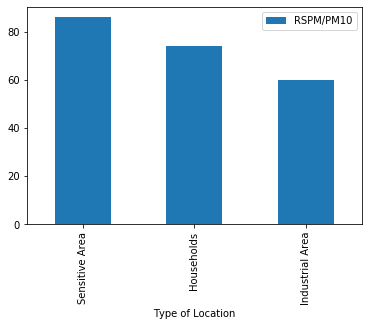

In [42]:
ds[['RSPM/PM10', 'Type of Location']].groupby(['Type of Location']).median().sort_values("RSPM/PM10", ascending = False).plot.bar()

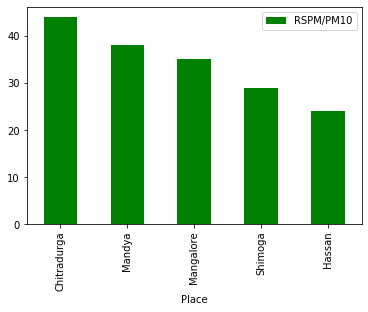

In [43]:
# Bar Plot of RSPM Concentration vs location - Least 5
ds[['RSPM/PM10', 'Place']].groupby(['Place']).median().sort_values("RSPM/PM10", ascending = False).tail(5).plot.bar(color = 'g')

# Scatter Plots Of All Columns

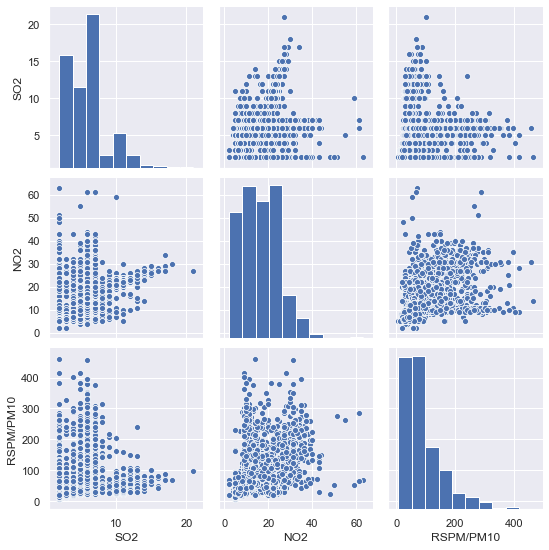

In [48]:

sb.set()
cols = ['SO2', 'NO2', 'RSPM/PM10']
sb.pairplot(ds[cols], height = 2.5)
plt.show()


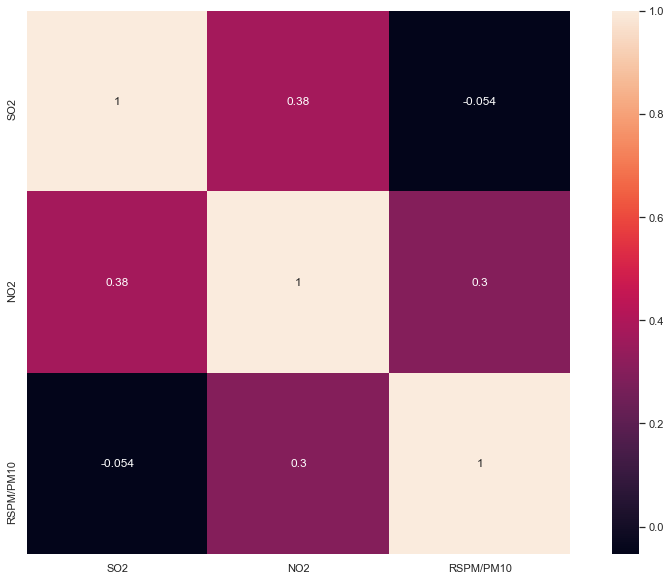

In [76]:
#Correlation matrix
corrmat = ds.corr()
f, ax = plt.subplots(figsize = (15, 10))
sb.heatmap(corrmat, vmax = 1, square = True, annot = True)


Now, we will add a new column 'year'. This is derived from the 'sampling date' column.

In [77]:
# Creating an year column
ds['Sampling Date'] = pd.to_datetime(ds['Sampling Date'])
ds['year'] = ds['Sampling Date'].dt.year # year

ds['year'] = ds['year'].fillna(0.0).astype(int)


In [78]:
ds.head() # year column has been added

,Sampling Date,State,Place,Type of Location,SO2,NO2,RSPM/PM10,year
0,2015-03-01,Karnataka,Mysore,Households,10.0,22.0,39.0,2015
1,2015-06-01,Karnataka,Mysore,Households,11.0,22.0,40.0,2015
2,2015-09-01,Karnataka,Mysore,Households,11.0,22.0,37.0,2015
3,2015-01-13,Karnataka,Mysore,Households,11.0,24.0,44.0,2015
4,2015-01-17,Karnataka,Mysore,Households,11.0,22.0,48.0,2015


## Heatmaps

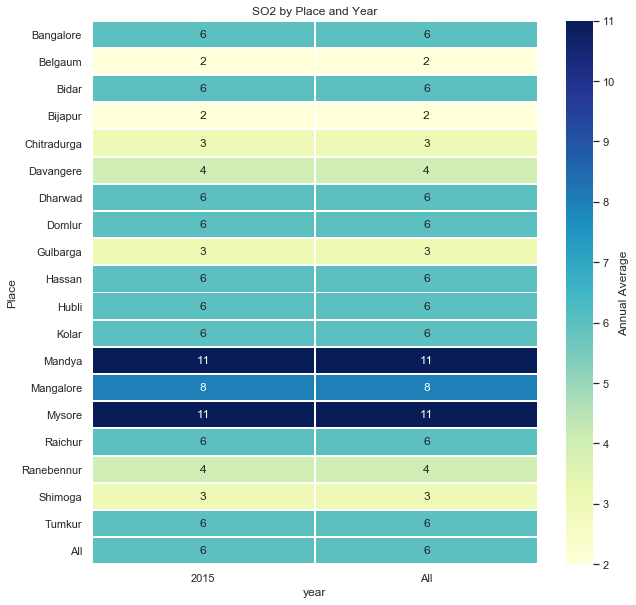

In [79]:
# Heatmap Pivot with Place as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by Place and Year'.format('SO2'))
sb.heatmap(ds.pivot_table('SO2', index='Place',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})


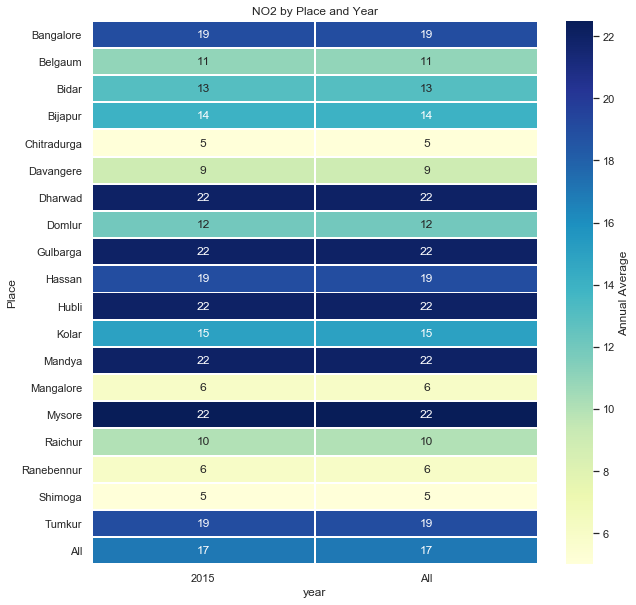

In [80]:
# Heatmap Pivot with Place as Row, Year as Col, NO2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by Place and Year'.format('NO2'))
sb.heatmap(ds.pivot_table('NO2', index='Place',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})


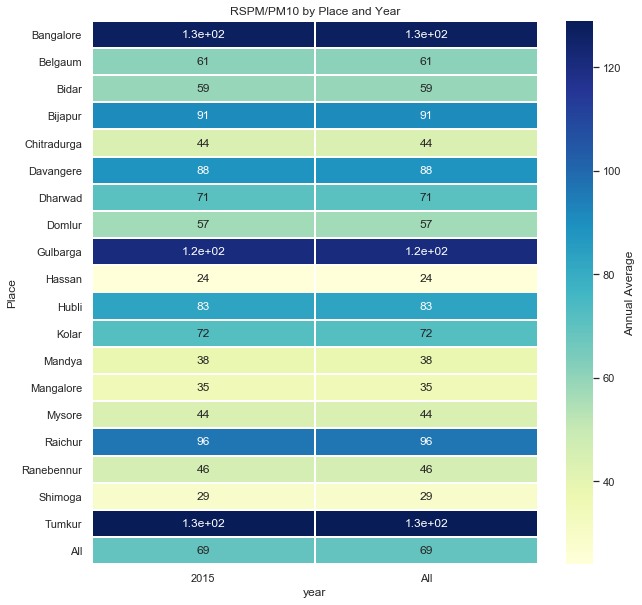

In [81]:
# Heatmap Pivot with Place as Row, Year as Col, RSPM as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by Place and Year'.format('RSPM/PM10'))
sb.heatmap(ds.pivot_table('RSPM/PM10', index='Place',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})
